In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pth = os.path.join('..', '..', 'data', 'modeling', 'predict')
adata = sc.read_h5ad(os.path.join(pth, 'CCCA.h5ad')); adata

AnnData object with n_obs × n_vars = 1406087 × 856
    obs: 'sample', 'cell_type', 'complexity', 'umap1', 'umap2', 'g1s_score', 'g2m_score', 'cell_cycle_phase', 'mp_top_score', 'mp_top', 'mp_assignment', 'ebv', 'celltype', 'Title', 'Category', 'Disease', 'Technology', 'Samples', 'Cells ', 'Name', 'patient', 'cell_subtype', 'source', 'disease', 'p16_status', 'site', 't_stage', 'n_stage', 'gender', 'race', 'age', 'tobacco_use', 'alcohol_use', 'hpv', 'hpv_score', 'treatment', 'procedure', 'sorting', 'cluster', 'malignant', 'sample_id', 'cell_subtype_clusters', 'tnm_stage', 'viral', 'location', 'cancer_type', 'treatment_exposure', 'treatment_response', 'cell_lineage', 'type', 'clusters_by_authors', 'cell_QCpass', 'is_tumor', 'cell_compartment', 'cluster_assignment', 'metastasis', 'sex', 'prior_enzalutamide', 'prior_abiraterone', 'prior_taxane', 'prior_platinum', 'prior_sipuleucel_T', 'purity', 'has_bulk_RNA', 'cancer_cell_state', 'PSA', 'source_region', 'gleason_score', 'ERG_status', 'core

In [3]:
# mean_z, std_z (samples)
df = (adata.obs.groupby(['source', 'sample'], observed = True)
      .agg({'latent_z' : ['mean', 'std'], 'Disease' : 'first'}))
df.columns = df.columns.map({('latent_z', 'mean') : 'mean_z',
                             ('latent_z', 'std')  : 'std_z',
                             ('Disease', 'first') : 'Disease'})

# mean, std of mean_z, std_z (diseases)
df = (df.groupby('Disease', observed = True)
      .agg({'mean_z' : ['mean', 'std'],
            'std_z' : ['mean', 'std']}))
df.columns = df.columns.map({
    ('mean_z', 'mean') : 'mean(mean_z)',
    ('mean_z', 'std')  : 'std(mean_z)',
    ('std_z', 'mean')  : 'mean(std_z)',
    ('std_z', 'std')   : 'std(std_z)'})

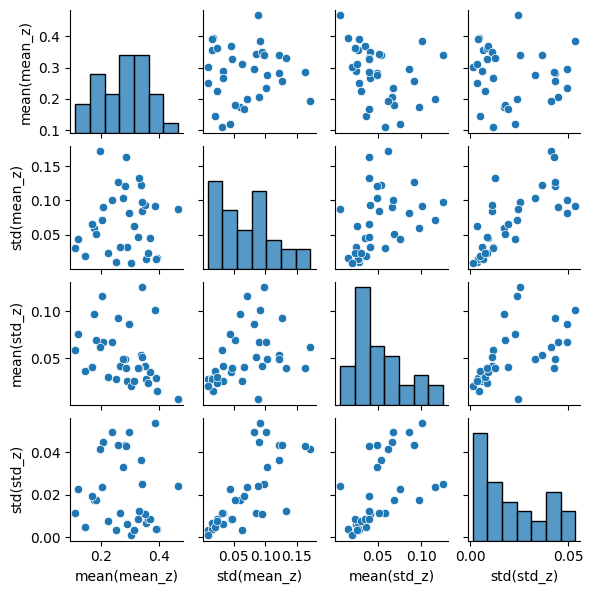

In [4]:
sns.pairplot(df, height = 1.5)
plt.show()

In [5]:
msk_std = (df['std(std_z)'] < .03)
msk_mean = (df['mean(std_z)'] > .06)
cols = ['mean(std_z)', 'mean(mean_z)']
df = df.loc[(msk_std & msk_mean), cols]
df.sort_values('mean(std_z)', ascending = False)

,mean(std_z),mean(mean_z)
Disease,,
Pediatric Brain Cancer,0.125049,0.341932
IDH-Mutant Glioma,0.116195,0.200992
Chronic Myeloid Leukemia,0.097051,0.174672
Synovial Sarcoma,0.075694,0.118724
Hepatocellular Carcinoma,0.069040,0.180093
